# Deep Learning Project 1 - MLPs and CNN for image classification

In [2]:
%load_ext autoreload
%autoreload 2

## Introduction
Submit a report (max. 5 pages, PDF format) for the following machine learning projects that follow. Explain briefly in the report the architectures that you used, how they were trained, tuned, etc. Describe challenges and problems and how they were addressed. Present in the report your experimental results and demos (e.g., screenshots) showing how your code works. Do not include code in the report, but include a link to a shared folder or repository (e.g. in Dropbox, GitHub, Bitbucket) containing your code. The project will contribute 30% to the final grade.

## Fashion item recognition
Given an image of a fashion item, build a deep learning model that recognizes the fashion item. You must use at least 2 different architectures, one with MLPs and one with CNNs. Use the Fashion-MNIST dataset to train and evaluate your models. More information about the task and the dataset can be found at 

https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

In [3]:
import sys
import gc
import pandas as pd
pd.set_option('max_colwidth', 300)

sys.path.append("../lib/")

In [4]:
labels = {
    0: "T-shirt/tip",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

def get_label(index: int):
    return labels.get(index, "undefined")

In [5]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.abspath(os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind))
    images_path = os.path.abspath(os.path.join(path, '%s-images-idx3-ubyte.gz' % kind))

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
train_images_original, train_labels_original = load_mnist("../../data", "train")
test_images_original, test_labels_original = load_mnist("../../data", "t10k")

In [7]:
import numpy as np
train_images = np.copy(train_images_original)
train_labels = np.copy(train_labels_original)
test_images = np.copy(test_images_original)
test_labels = np.copy(test_labels_original)

In [8]:
print("Train Images: ", train_images.shape)
print("Train Labels: ", len(train_labels))
print()
print("Test Images: ", test_images.shape)
print("Test Labels: ", len(test_labels))

Train Images:  (60000, 784)
Train Labels:  60000

Test Images:  (10000, 784)
Test Labels:  10000


## Resources

- https://www.tensorflow.org/tutorials/keras/classification
- https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/
- https://github.com/zalandoresearch/fashion-mnist
- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [9]:
train_images_count = 60000
test_images_count = 10000
image_size = 28

In [10]:
train_images = train_images.reshape((train_images_count, image_size, image_size))/255.0
test_images = test_images.reshape((test_images_count, image_size, image_size))/255.0

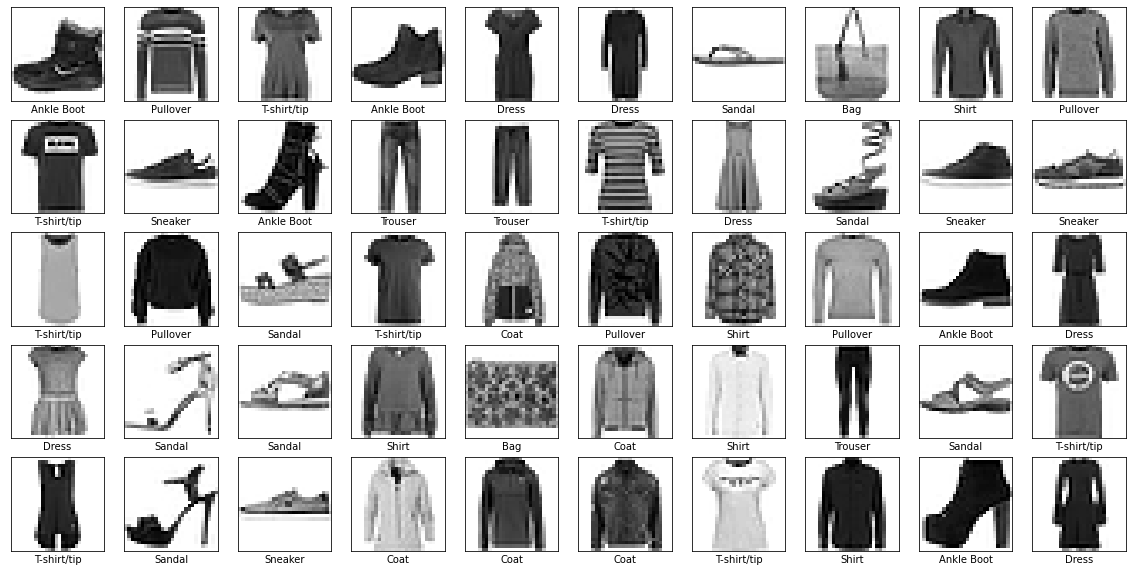

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(0, 50):
    ax = axes[int(i%5), int(i/5)]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(train_images[i], cmap=plt.cm.binary)
    ax.set_xlabel(get_label(train_labels[i]))

## Split data

In [12]:
random_state = 19870127

The train images are evenly distribution across all classes with every class having 6000 images o the type so we don't need to take any measures to prevent class overfitting.

In [13]:
counts_per_class = np.unique(train_labels, return_counts=True)
display(counts_per_class)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

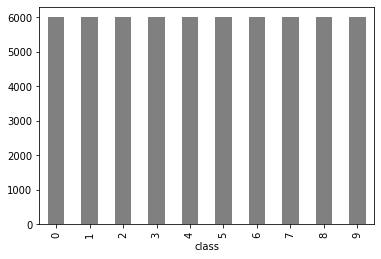

In [14]:
class_dist = pd.DataFrame(train_labels, columns=["class"])
class_dist['class'].groupby(class_dist["class"]).count().plot(kind = "bar", color = 'gray')

Splitting train set to **80%** used for training and **20%** used for validation

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, stratify = train_labels, test_size=0.20, random_state=random_state)

In [16]:
import tensorflow as tf

np.random.seed(19870127)
tf.random.set_seed(19870127)

display(tf.config.list_physical_devices())
display("Tensorflow version " + tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

'Tensorflow version 2.1.0'

In [17]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## MLP

In [18]:
from DeepLearning import MLP, Visualize

Using TensorFlow backend.


### MLP Baseline

Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb830264910>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callbacks.callbacks.ReduceLROnPlateau object at 0x7fb7d8542190>]

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00062: early stopping
Train loss 0.3572

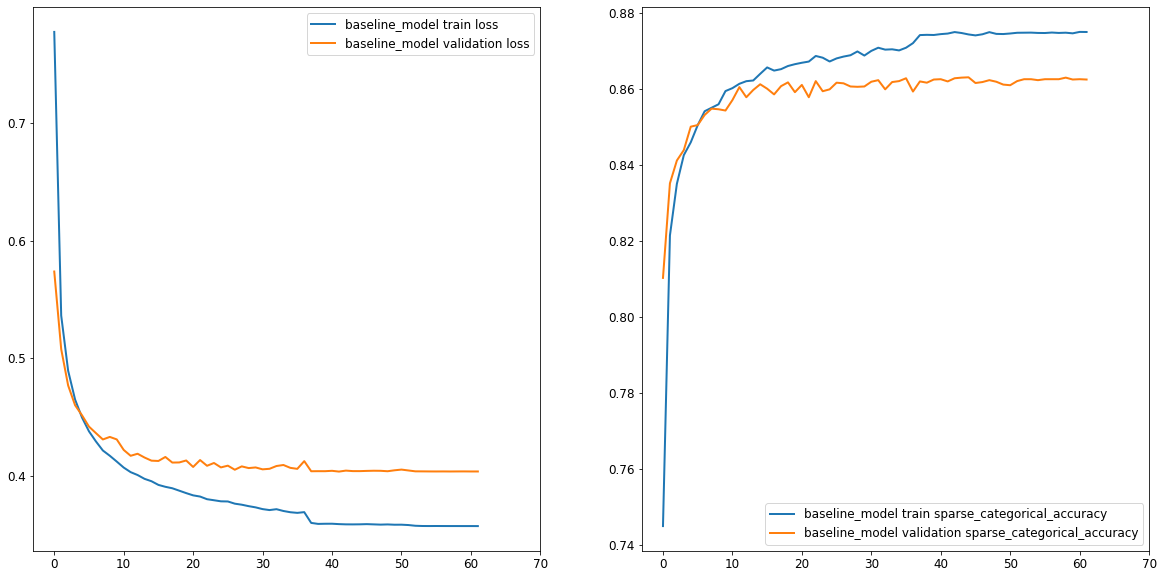

In [28]:
baseline_model , baseline_history = MLP.train((X_train, y_train), (X_val, y_val), name="baseline_model", dense_layers=None, verbose=0, epochs=300)
Visualize.history({"baseline_model": baseline_history})
baseline_model_evaluation = MLP.evaluate(baseline_model, test_images, test_labels)
MLP.summary(baseline_history, baseline_model_evaluation)
MLP.clean_up(baseline_model)

### MLP 1 Layer 32 units

In [29]:
layers = [
    {"units": 32, "activation": "relu", "dropout": 0.20},
]

model_1_32 , model_1_32_history = MLP.train(
    (X_train, y_train), (X_val, y_val), name="model_1_32", dense_layers=layers, verbose=0, epochs=300
)
model_1_32_evaluation = MLP.evaluate(model_1_32, test_images, test_labels)
MLP.summary(model_1_32_history, model_1_32_evaluation)
MLP.clean_up(model_1_32)

Model: "model_1_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_32_relu (Dense)      (None, 32)                25120     
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 32)                0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb7d8422e90>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callbacks.ca

### MLP 1 Layer 128 units

In [30]:
layers = [
    {"units": 128, "activation": "relu", "dropout": 0.20},
]


model_1_128 , model_1_128_history = MLP.train((X_train, y_train), (X_val, y_val), name="model_1_128", dense_layers=layers, verbose=0, epochs=300)
model_1_128_evaluation = MLP.evaluate(model_1_128, test_images, test_labels)
MLP.summary(model_1_128_history, model_1_128_evaluation)
MLP.clean_up(model_1_128)

Model: "model_1_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_128_relu (Dense)     (None, 128)               100480    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 128)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb7f4079050>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callbacks

### MLP 2 Layers 128 units, 64 Units

In [31]:
layers = [
    {"units": 128, "activation": "relu", "dropout": 0.20},
    {"units": 64, "activation": "relu", "dropout": 0.20},
]


model_2_128_64 , model_2_128_64_history = MLP.train((X_train, y_train), (X_val, y_val), name="model_2_128_64", dense_layers=layers, verbose=0, epochs=300)
model_2_128_64_evaluation = MLP.evaluate(model_2_128_64, test_images, test_labels)
MLP.summary(model_2_128_64_history, model_2_128_64_evaluation)
MLP.clean_up(model_2_128_64)

Model: "model_2_128_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_128_relu (Dense)     (None, 128)               100480    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 128)               0         
_________________________________________________________________
dense_1_64_relu (Dense)      (None, 64)                8256      
_________________________________________________________________
dropout_1_0.2 (Dropout)      (None, 64)                0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
______________________________________________

### MLP 2 Layers 256 units, 128 Units

In [32]:
layers = [
    {"units": 256, "activation": "relu", "dropout": 0.20},
    {"units": 128, "activation": "relu", "dropout": 0.20},
]


model_2_256_128 , model_2_256_128_history = MLP.train((X_train, y_train), (X_val, y_val), name="model_2_256_128", dense_layers=layers, verbose=0, epochs=300)
model_2_256_128_evaluation = MLP.evaluate(model_2_256_128, test_images, test_labels)
MLP.summary(model_2_256_128_history, model_2_256_128_evaluation)
MLP.clean_up(model_2_256_128)

Model: "model_2_256_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_256_relu (Dense)     (None, 256)               200960    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 256)               0         
_________________________________________________________________
dense_1_128_relu (Dense)     (None, 128)               32896     
_________________________________________________________________
dropout_1_0.2 (Dropout)      (None, 128)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_____________________________________________

### MLP 1 Layers 256 units

In [33]:
layers = [
    {"units": 256, "activation": "relu", "dropout": 0.20}
]


model_1_256, model_1_256_history = MLP.train((X_train, y_train), (X_val, y_val), name="baseline_model", dense_layers=layers, verbose=0, epochs=300)
model_1_256_evaluation = MLP.evaluate(model_1_256, test_images, test_labels)
MLP.summary(model_1_256_history, model_1_256_evaluation)
MLP.clean_up(model_1_256)

Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_256_relu (Dense)     (None, 256)               200960    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 256)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb83018ea50>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callba

### MLP 1 Layers 64 units

In [34]:
layers = [
    {"units": 64, "activation": "relu", "dropout": 0.20}
]


model_1_64, model_1_64_history = MLP.train((X_train, y_train), (X_val, y_val), name="baseline_model", dense_layers=layers, epochs=300)
model_1_64_evaluation = MLP.evaluate(model_1_64, test_images, test_labels)
MLP.summary(model_1_64_history, model_1_64_evaluation)

Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_64_relu (Dense)      (None, 64)                50240     
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 64)                0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb7d81e9550>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callback

### Manual Summary

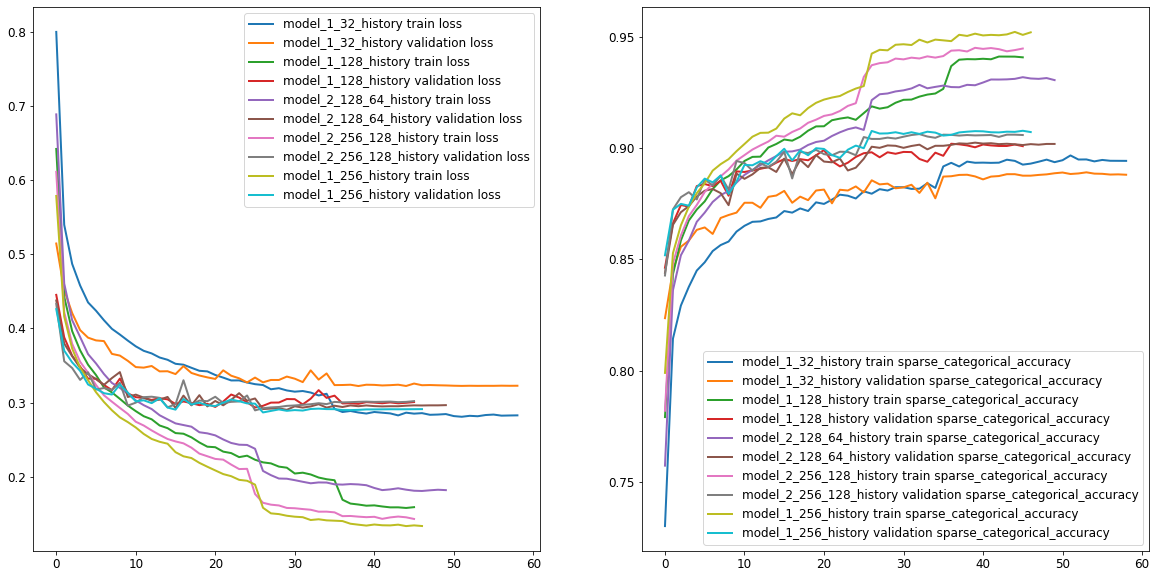

In [35]:
Visualize.history({
    "model_1_32_history": model_1_32_history,
    "model_1_128_history": model_1_128_history,
    "model_2_128_64_history": model_2_128_64_history,
    "model_2_256_128_history": model_2_256_128_history,
    "model_1_256_history": model_1_256_history
})

In [36]:
t = MLP.create_stats([
    ("model_1_32", model_1_32_history, model_1_32_evaluation),
    ("model_1_128", model_1_128_history, model_1_128_evaluation),
    ("model_2_128_64", model_2_128_64_history, model_2_128_64_evaluation),
    ("model_2_256_128", model_2_256_128_history, model_2_256_128_evaluation),
    ("model_1_256", model_1_256_history, model_1_256_evaluation),
])

display(t.drop(["test_loss", "test_categorical_accuracy"], axis=1))

,model_name,train_loss,validation_loss,train_categorical_accuracy,validation_categorical_accuracy
0,model_1_32,0.282825,0.322746,0.894229,0.888000
1,model_1_128,0.159077,0.300739,0.940729,0.900833
2,model_2_128_64,0.182035,0.296595,0.930500,0.901833
3,model_2_256_128,0.143173,0.302013,0.944687,0.905833
4,model_1_256,0.133646,0.291238,0.951958,0.907167


### Talos

I am gonna use Early stopping for all my fits so that the model does not overfit the train data to the point where it starts to lose accuracy on validation.

This will help me add more epochs and the fit will stop at the point that validation accuracy drops.

For early stopping i ll monitor `val_sparse_categorical_accuracy` and add a paetience of 20 epochs to give a slack
for when the increment in train accuaracy does not have an immediate effect in validation accuracy.




#### MLP Architecture

In [23]:
import talos
import pandas as pd

In [38]:
talos_callbacks = [
    MLP.earlyStopping, 
    MLP.reduceLROnPlateau,
#     talos.utils.live()
]

def mlp_model(x_train, y_train, x_val, y_val, params):
    print("================================")
    K.clear_session()
    dense_layers = []
    for units in params["architecture"]:
        dense_layers.append({"units": units, "activation": params["activation"], "dropout": params['dropout']})
    talos_model = MLP.create_model(name="talos_model", dense_layers=dense_layers, optimizer=params['optimizer'][0](**params['optimizer'][1]))

    talos_model_history = MLP.fit(
        (x_train, y_train), 
        (x_val, y_val), 
        talos_model,
        epochs=params["epochs"],
        batch_size=params["batch_size"],
        callbacks=talos_callbacks,
        verbose=0
    )
    talos_model_evaluation = MLP.evaluate(talos_model, test_images, test_labels)
    MLP.summary(talos_model_history, talos_model_evaluation)
    print("================================")
    return talos_model_history, talos_model

- https://towardsdatascience.com/finding-the-right-architecture-for-neural-network-b0439efa4587
- https://github.com/autonomio/talos/blob/master/talos/scan/Scan.py

In [43]:
# The archutecture represents the number of units per layer
# e.g. [32] means 1 layer
#      [64, 32] means 2 layers 1st: 64 units, 2nd: 32 units
p_architecture = {
    'architecture':[
        [256, 256], [384], [384, 256, 128], [512], [512, 256], [512, 512], [768], [768, 768], [768, 512], [768, 512, 256]
    ],
    'batch_size': [128],
    'epochs': [300],
    'dropout': [0.2, 0.25, 0.3],
    'optimizer': [
        (tf.keras.optimizers.Adam, {"lr": 0.001}),
    ],
    'activation':['relu'],
    'last_activation': ['softmax']
}

# and run the experiment
t_architecture = talos.Scan(
    x=X_train, 
    y = y_train,
    model=mlp_model,
    params=p_architecture,
    x_val=X_val,
    y_val=y_val,
    experiment_name='fashion_minst_mlp',
    print_params=True
)


  0%|          | 0/30 [00:00<?, ?it/s]

{'activation': 'relu', 'architecture': [256, 256], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_256_relu (Dense)     (None, 256)               200960    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 256)               0         
_________________________________________________________________
dense_1_256_relu (Dense)     (None, 256)               65792     
_________________________________________________________________
dropout_1_0.2 (Dropout)      (None, 256)               0         
__________________________________


  3%|▎         | 1/30 [00:38<18:38, 38.57s/it]

Train loss 0.1427454932530721
Validation loss 0.2947229902346929
Test loss 0.318542794752121
Train categorical accuracy 0.9452499747276306
Validation categorical accuracy 0.9075000286102295
Test categorical accuracy 0.901199996471405
{'activation': 'relu', 'architecture': [256, 256], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_256_relu (Dense)     (None, 256)               200960    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 256)               0         
_______________________________________________________________


  7%|▋         | 2/30 [01:24<18:59, 40.69s/it]

Train loss 0.15542365867892902
Validation loss 0.2920950524409612
Test loss 0.32737620886564256
Train categorical accuracy 0.9402083158493042
Validation categorical accuracy 0.9074166417121887
Test categorical accuracy 0.8978000283241272
{'activation': 'relu', 'architecture': [256, 256], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_256_relu (Dense)     (None, 256)               200960    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 256)               0         
____________________________________________________________


 10%|█         | 3/30 [02:08<18:48, 41.81s/it]

Train loss 0.14848304587602615
Validation loss 0.3074847816626231
Test loss 0.327657777762413
Train categorical accuracy 0.9423333406448364
Validation categorical accuracy 0.9067500233650208
Test categorical accuracy 0.8996000289916992
{'activation': 'relu', 'architecture': [384], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 384)               0         
_________________________________________________________________
d


 13%|█▎        | 4/30 [02:45<17:30, 40.41s/it]

Train loss 0.1109327954252561
Validation loss 0.30350167083740237
Test loss 0.33043717604577544
Train categorical accuracy 0.9601041674613953
Validation categorical accuracy 0.9070833325386047
Test categorical accuracy 0.8992999792098999
{'activation': 'relu', 'architecture': [384], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 384)               0         
________________________________________________________________


 17%|█▋        | 5/30 [03:22<16:26, 39.45s/it]

Train loss 0.12559272002180416
Validation loss 0.29587658631801605
Test loss 0.327922828873992
Train categorical accuracy 0.9533541798591614
Validation categorical accuracy 0.9074166417121887
Test categorical accuracy 0.8966000080108643
{'activation': 'relu', 'architecture': [384], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 384)               0         
_________________________________________________________________



 20%|██        | 6/30 [04:03<15:54, 39.78s/it]

Train loss 0.1403486546178659
Validation loss 0.2870117652416229
Test loss 0.3185234367370606
Train categorical accuracy 0.9485416412353516
Validation categorical accuracy 0.9085833430290222
Test categorical accuracy 0.9013000130653381
{'activation': 'relu', 'architecture': [384, 256, 128], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 384)               0         
_________________________________________________________


 23%|██▎       | 7/30 [04:51<16:09, 42.17s/it]

Train loss 0.13583580619096755
Validation loss 0.3237975780566533
Test loss 0.3602436988607049
Train categorical accuracy 0.9471874833106995
Validation categorical accuracy 0.9070833325386047
Test categorical accuracy 0.8981999754905701
{'activation': 'relu', 'architecture': [384, 256, 128], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 384)               0         
_______________________________________________________


 27%|██▋       | 8/30 [05:49<17:14, 47.04s/it]

Train loss 0.15330914463599524
Validation loss 0.298719042857488
Test loss 0.33650066514462235
Train categorical accuracy 0.940500020980835
Validation categorical accuracy 0.9083333611488342
Test categorical accuracy 0.8992000222206116
{'activation': 'relu', 'architecture': [384, 256, 128], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_384_relu (Dense)     (None, 384)               301440    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 384)               0         
_________________________________________________________


 30%|███       | 9/30 [06:47<17:34, 50.23s/it]

Train loss 0.17832381196816763
Validation loss 0.2910331500371297
Test loss 0.32158348721265795
Train categorical accuracy 0.9314583539962769
Validation categorical accuracy 0.906000018119812
Test categorical accuracy 0.8988000154495239
{'activation': 'relu', 'architecture': [512], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 512)               0         
_________________________________________________________________



 33%|███▎      | 10/30 [07:30<16:03, 48.19s/it]

Train loss 0.10622260148326555
Validation loss 0.30543521110216776
Test loss 0.33321205213069915
Train categorical accuracy 0.961187481880188
Validation categorical accuracy 0.9066666960716248
Test categorical accuracy 0.9003999829292297
{'activation': 'relu', 'architecture': [512], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 512)               0         
________________________________________________________________


 37%|███▋      | 11/30 [08:18<15:13, 48.10s/it]

Train loss 0.12465130312244098
Validation loss 0.2923123933076858
Test loss 0.3200866695195436
Train categorical accuracy 0.9548749923706055
Validation categorical accuracy 0.9076666831970215
Test categorical accuracy 0.9016000032424927
{'activation': 'relu', 'architecture': [512], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 512)               0         
_________________________________________________________________



 40%|████      | 12/30 [09:06<14:24, 48.03s/it]

Train loss 0.1342542203962803
Validation loss 0.2869368524948756
Test loss 0.3125043442517519
Train categorical accuracy 0.9502708315849304
Validation categorical accuracy 0.9097499847412109
Test categorical accuracy 0.9045000076293945
{'activation': 'relu', 'architecture': [512, 256], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 512)               0         
______________________________________________________________


 43%|████▎     | 13/30 [09:48<13:06, 46.25s/it]

Train loss 0.1371753578086694
Validation loss 0.3042563134431839
Test loss 0.32598051396459343
Train categorical accuracy 0.9476458430290222
Validation categorical accuracy 0.906499981880188
Test categorical accuracy 0.8996000289916992
{'activation': 'relu', 'architecture': [512, 256], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 512)               0         
_____________________________________________________________


 47%|████▋     | 14/30 [10:49<13:29, 50.60s/it]

Train loss 0.13422004714608193
Validation loss 0.30112035155296324
Test loss 0.32820115171074865
Train categorical accuracy 0.9481250047683716
Validation categorical accuracy 0.909333348274231
Test categorical accuracy 0.8999999761581421
{'activation': 'relu', 'architecture': [512, 256], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 512)               0         
____________________________________________________________


 50%|█████     | 15/30 [11:43<12:52, 51.50s/it]

Train loss 0.149620172560215
Validation loss 0.30236900778611503
Test loss 0.3267776827931404
Train categorical accuracy 0.9413541555404663
Validation categorical accuracy 0.9069166779518127
Test categorical accuracy 0.9010000228881836
{'activation': 'relu', 'architecture': [512, 512], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 512)               0         
______________________________________________________________


 53%|█████▎    | 16/30 [12:46<12:49, 54.97s/it]

Train loss 0.12331132591764132
Validation loss 0.30460571420192717
Test loss 0.3344991068452597
Train categorical accuracy 0.9523333311080933
Validation categorical accuracy 0.9078333377838135
Test categorical accuracy 0.900600016117096
{'activation': 'relu', 'architecture': [512, 512], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 512)               0         
____________________________________________________________


 57%|█████▋    | 17/30 [13:56<12:55, 59.63s/it]

Train loss 0.1309547458489736
Validation loss 0.29900862769285835
Test loss 0.3229679674103856
Train categorical accuracy 0.9489166736602783
Validation categorical accuracy 0.9103333353996277
Test categorical accuracy 0.9036999940872192
{'activation': 'relu', 'architecture': [512, 512], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_512_relu (Dense)     (None, 512)               401920    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 512)               0         
_____________________________________________________________


 60%|██████    | 18/30 [15:08<12:41, 63.42s/it]

Train loss 0.14552576234936715
Validation loss 0.2954350680510203
Test loss 0.32116967156529425
Train categorical accuracy 0.9438124895095825
Validation categorical accuracy 0.9086666703224182
Test categorical accuracy 0.9014999866485596
{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 768)               0         
_________________________________________________________________


 63%|██████▎   | 19/30 [16:06<11:18, 61.70s/it]

Train loss 0.09919643179575602
Validation loss 0.3114331469138463
Test loss 0.34249654806256297
Train categorical accuracy 0.9643958210945129
Validation categorical accuracy 0.9073333144187927
Test categorical accuracy 0.9007999897003174
{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 768)               0         
________________________________________________________________


 67%|██████▋   | 20/30 [17:09<10:19, 61.94s/it]

Train loss 0.11888251570860545
Validation loss 0.29185715413093566
Test loss 0.3198826413720846
Train categorical accuracy 0.9563124775886536
Validation categorical accuracy 0.9074166417121887
Test categorical accuracy 0.9038000106811523
{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_________________________________________________________________


 70%|███████   | 21/30 [18:08<09:10, 61.20s/it]

Train loss 0.10875386905670166
Validation loss 0.3057733850081762
Test loss 0.34362765186578037
Train categorical accuracy 0.9602083563804626
Validation categorical accuracy 0.9103333353996277
Test categorical accuracy 0.9020000100135803
{'activation': 'relu', 'architecture': [768, 768], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 768)               0         
____________________________________________________________


 73%|███████▎  | 22/30 [19:28<08:55, 66.93s/it]

Train loss 0.11393699492017428
Validation loss 0.32305770965417224
Test loss 0.34484096583276985
Train categorical accuracy 0.9555624723434448
Validation categorical accuracy 0.9086666703224182
Test categorical accuracy 0.9041000008583069
{'activation': 'relu', 'architecture': [768, 768], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 768)               0         
__________________________________________________________


 77%|███████▋  | 23/30 [21:20<09:22, 80.39s/it]

Train loss 0.11918122591574987
Validation loss 0.31232659057776135
Test loss 0.33944829247295855
Train categorical accuracy 0.953000009059906
Validation categorical accuracy 0.909500002861023
Test categorical accuracy 0.9035000205039978
{'activation': 'relu', 'architecture': [768, 768], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_____________________________________________________________


 80%|████████  | 24/30 [22:56<08:30, 85.10s/it]

Train loss 0.13180222684144974
Validation loss 0.3061664398908615
Test loss 0.3312664385974407
Train categorical accuracy 0.9482499957084656
Validation categorical accuracy 0.9090833067893982
Test categorical accuracy 0.9018999934196472
{'activation': 'relu', 'architecture': [768, 512], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 768)               0         
_____________________________________________________________


 83%|████████▎ | 25/30 [24:34<07:24, 88.88s/it]

Train loss 0.10447175991535186
Validation loss 0.32914927331606547
Test loss 0.360107147243619
Train categorical accuracy 0.9583749771118164
Validation categorical accuracy 0.909333348274231
Test categorical accuracy 0.902999997138977
{'activation': 'relu', 'architecture': [768, 512], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 768)               0         
______________________________________________________________


 87%|████████▋ | 26/30 [25:46<05:35, 83.88s/it]

Train loss 0.1329353903234005
Validation loss 0.30862655568122865
Test loss 0.33511634186506273
Train categorical accuracy 0.9479583501815796
Validation categorical accuracy 0.9055833220481873
Test categorical accuracy 0.9021000266075134
{'activation': 'relu', 'architecture': [768, 512], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
____________________________________________________________


 90%|█████████ | 27/30 [27:28<04:27, 89.16s/it]

Train loss 0.12791124077637991
Validation loss 0.3064070365826289
Test loss 0.3338623783349991
Train categorical accuracy 0.9503750205039978
Validation categorical accuracy 0.909333348274231
Test categorical accuracy 0.9053000211715698
{'activation': 'relu', 'architecture': [768, 512, 256], 'batch_size': 128, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 768)               0         
_________________________________________________________


 93%|█████████▎| 28/30 [28:52<02:55, 87.77s/it]

Train loss 0.12818858603636424
Validation loss 0.3248921532034874
Test loss 0.34878915715813635
Train categorical accuracy 0.9495833516120911
Validation categorical accuracy 0.9081666469573975
Test categorical accuracy 0.9025999903678894
{'activation': 'relu', 'architecture': [768, 512, 256], 'batch_size': 128, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.25 (Dropout)     (None, 768)               0         
______________________________________________________


 97%|█████████▋| 29/30 [30:40<01:33, 93.73s/it]

Train loss 0.14475796058773993
Validation loss 0.3098654975891113
Test loss 0.3336525225400925
Train categorical accuracy 0.9423333406448364
Validation categorical accuracy 0.9079166650772095
Test categorical accuracy 0.8992999792098999
{'activation': 'relu', 'architecture': [768, 512, 256], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
________________________________________________________


100%|██████████| 30/30 [32:35<00:00, 65.19s/it] 

Train loss 0.14092005665103594
Validation loss 0.32608735644817355
Test loss 0.34657471368312837
Train categorical accuracy 0.9448333382606506
Validation categorical accuracy 0.9077500104904175
Test categorical accuracy 0.9000999927520752


In [48]:
t_arch_analyze_object = talos.Analyze(t_architecture)

arch_results = pd.DataFrame(t_arch_analyze_object.data).sort_values(by='val_sparse_categorical_accuracy', ascending=False).drop(['start', 'end', 'duration'], axis=1)
arch_results.to_csv("results_talos_mlp_architecture.csv")
arch_results.head(10)

,round_epochs,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr,activation,architecture,batch_size,dropout,epochs,last_activation,optimizer
16,45,0.130955,0.948917,0.299009,0.910333,0.00001,relu,"[512, 512]",128,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
20,45,0.108754,0.960208,0.305773,0.910333,0.00010,relu,[768],128,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
11,47,0.134254,0.950271,0.286937,0.909750,0.00001,relu,[512],128,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
22,47,0.119181,0.953000,0.312327,0.909500,0.00001,relu,"[768, 768]",128,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
26,51,0.127911,0.950375,0.306407,0.909333,0.00001,relu,"[768, 512]",128,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
24,46,0.104472,0.958375,0.329149,0.909333,0.00001,relu,"[768, 512]",128,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
13,46,0.134220,0.948125,0.301120,0.909333,0.00001,relu,"[512, 256]",128,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
23,41,0.131802,0.948250,0.306166,0.909083,0.00010,relu,"[768, 768]",128,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
21,34,0.113937,0.955562,0.323058,0.908667,0.00010,relu,"[768, 768]",128,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
17,47,0.145526,0.943812,0.295435,0.908667,0.00001,relu,"[512, 512]",128,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"


#### MLP Batch and Optimizer

In [49]:
# The archutecture represents the number of units per layer
# e.g. [32] means 1 layer
#      [64, 32] means 2 layers 1st: 64 units, 2nd: 32 units
p_optimizers = {
    'architecture':[[768]],
    'batch_size': [128, 256, 384],
    'epochs': [300],
    'dropout': [0.3],
    'optimizer': [
        (tf.keras.optimizers.Adam, {"lr": 0.001}),
        (tf.keras.optimizers.SGD, {"lr": 0.01, "momentum": 0.9, "nesterov": False}),
        (tf.keras.optimizers.SGD, {"lr": 0.01, "momentum": 0.9, "nesterov": True})
    ],
    'activation':['relu'],
    'last_activation': ['softmax']
}

# and run the experiment
t_optimizers = talos.Scan(
    x=X_train, 
    y = y_train,
    model=mlp_model,
    params=p_optimizers,
    x_val=X_val,
    y_val=y_val,
    experiment_name='fashion_minst_mlp_optimizers',
    print_params=True
)




  0%|          | 0/9 [00:00<?, ?it/s]

{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                7690      
Total params: 610,570
Trainable params: 610,570
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <te




 11%|█         | 1/9 [01:07<08:59, 67.39s/it]

Train loss 0.12588151169816653
Validation loss 0.2895209781726201
Test loss 0.315461752858758
Train categorical accuracy 0.953083336353302
Validation categorical accuracy 0.9084166884422302
Test categorical accuracy 0.9013000130653381
{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
______________________




 22%|██▏       | 2/9 [03:04<09:36, 82.37s/it]

Train loss 0.11738308104872704
Validation loss 0.28010984273751577
Test loss 0.30321440583467485
Train categorical accuracy 0.960604190826416
Validation categorical accuracy 0.9045000076293945
Test categorical accuracy 0.8999000191688538
{'activation': 'relu', 'architecture': [768], 'batch_size': 128, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
____________________




 33%|███▎      | 3/9 [05:16<09:42, 97.09s/it]

Train loss 0.14551450051863987
Validation loss 0.2772663274208705
Test loss 0.30157064825296404
Train categorical accuracy 0.9512083530426025
Validation categorical accuracy 0.9055833220481873
Test categorical accuracy 0.8991000056266785
{'activation': 'relu', 'architecture': [768], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_________________________________________________________________




 44%|████▍     | 4/9 [06:12<07:04, 84.93s/it]

Train loss 0.119990331808726
Validation loss 0.28233716054757435
Test loss 0.3154682578206062
Train categorical accuracy 0.9573958516120911
Validation categorical accuracy 0.9083333611488342
Test categorical accuracy 0.9014000296592712
{'activation': 'relu', 'architecture': [768], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_____________________




 56%|█████▌    | 5/9 [08:16<06:25, 96.45s/it]

Train loss 0.15410026148955028
Validation loss 0.2803396646976471
Test loss 0.30032895140647886
Train categorical accuracy 0.9472916722297668
Validation categorical accuracy 0.9025833606719971
Test categorical accuracy 0.8970000147819519
{'activation': 'relu', 'architecture': [768], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
____________________




 67%|██████▋   | 6/9 [10:20<05:14, 104.86s/it]

Train loss 0.12224448478221893
Validation loss 0.27818484195073445
Test loss 0.3036297079265118
Train categorical accuracy 0.960604190826416
Validation categorical accuracy 0.9053333401679993
Test categorical accuracy 0.8970999717712402
{'activation': 'relu', 'architecture': [768], 'batch_size': 384, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_________________________________________________________________





 78%|███████▊  | 7/9 [11:01<02:51, 85.58s/it] 

Train loss 0.11157705950737
Validation loss 0.28969647550582883
Test loss 0.32255567388534545
Train categorical accuracy 0.9601041674613953
Validation categorical accuracy 0.909500002861023
Test categorical accuracy 0.9017999768257141
{'activation': 'relu', 'architecture': [768], 'batch_size': 384, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
______________________




 89%|████████▉ | 8/9 [13:08<01:38, 98.03s/it]

Train loss 0.14862708950042725
Validation loss 0.2791747599840164
Test loss 0.29899119445085526
Train categorical accuracy 0.9514999985694885
Validation categorical accuracy 0.9027500152587891
Test categorical accuracy 0.8967999815940857
{'activation': 'relu', 'architecture': [768], 'batch_size': 384, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})}
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
____________________




100%|██████████| 9/9 [15:24<00:00, 102.76s/it]

Train loss 0.14539935940504073
Validation loss 0.2782509335279465
Test loss 0.3030971073448658
Train categorical accuracy 0.9526666402816772
Validation categorical accuracy 0.9022499918937683
Test categorical accuracy 0.8962000012397766


In [50]:
t_opt_analyze_object = talos.Analyze(t_optimizers)

opt_results = pd.DataFrame(t_opt_analyze_object.data).sort_values(by='val_sparse_categorical_accuracy', ascending=False).drop(['start', 'end', 'duration'], axis=1)
opt_results.to_csv("results_talos_mlp_opt.csv")
opt_results.head(10)

,round_epochs,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr,activation,architecture,batch_size,dropout,epochs,last_activation,optimizer
6,48,0.111577,0.960104,0.289696,0.909500,0.00010,relu,[768],384,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
0,47,0.125882,0.953083,0.289521,0.908417,0.00001,relu,[768],128,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
3,52,0.119990,0.957396,0.282337,0.908333,0.00001,relu,[768],256,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
2,96,0.145515,0.951208,0.277266,0.905583,0.00001,relu,[768],128,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})"
5,122,0.122244,0.960604,0.278185,0.905333,0.00010,relu,[768],256,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})"
1,86,0.117383,0.960604,0.280110,0.904500,0.00010,relu,[768],128,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})"
7,157,0.148627,0.951500,0.279175,0.902750,0.00010,relu,[768],384,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})"
4,121,0.154100,0.947292,0.280340,0.902583,0.00010,relu,[768],256,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': False})"
8,169,0.145399,0.952667,0.278251,0.902250,0.00001,relu,[768],384,0.3,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, {'lr': 0.01, 'momentum': 0.9, 'nesterov': True})"


## MLP Evalution

In [52]:
layers = [
    {"units": 768, "activation": "relu", "dropout": 0.3},
]

adam_optimizer = tf.optimizers.Adam(lr=0.001)

model_mlp_final , model_mlp_final_history = MLP.train((X_train, y_train), (X_val, y_val), name="model_mlp_final", dense_layers=layers, verbose=0, epochs=300, batch_size=384, optimizer=adam_optimizer)
model_mlp_final_evaluation = MLP.evaluate(model_mlp_final, test_images, test_labels)
MLP.summary(model_mlp_final_history, model_mlp_final_evaluation)
tf.keras.models.save_model(model_mlp_final, "models/model_mlp_final", overwrite=True, include_optimizer=True)
MLP.clean_up(model_mlp_final)

Model: "model_mlp_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_0_768_relu (Dense)     (None, 768)               602880    
_________________________________________________________________
dropout_0_0.3 (Dropout)      (None, 768)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                7690      
Total params: 610,570
Trainable params: 610,570
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fb74c911090>
Fitting for 300 epochs 
with 384 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7fb7d8542950>, <keras.callb

## CNN

In [19]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1)

- generic: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
- stride padding: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/
- https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/

In [20]:
from DeepLearning import CNN, Visualize

### CNN Baseline

#### Simple

Model: "model_cnn_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
cnn_flatten_connect (Flatten (None, 1568)              0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                15690     
Total params: 15,770
Trainable params: 15,770
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f66c869bb50>
Fitting for 300 epochs 
with 256 batch_size and 
callbacks[<keras.callbacks.callbacks.EarlyStopping object at 0x7f6780545210>, <keras.call

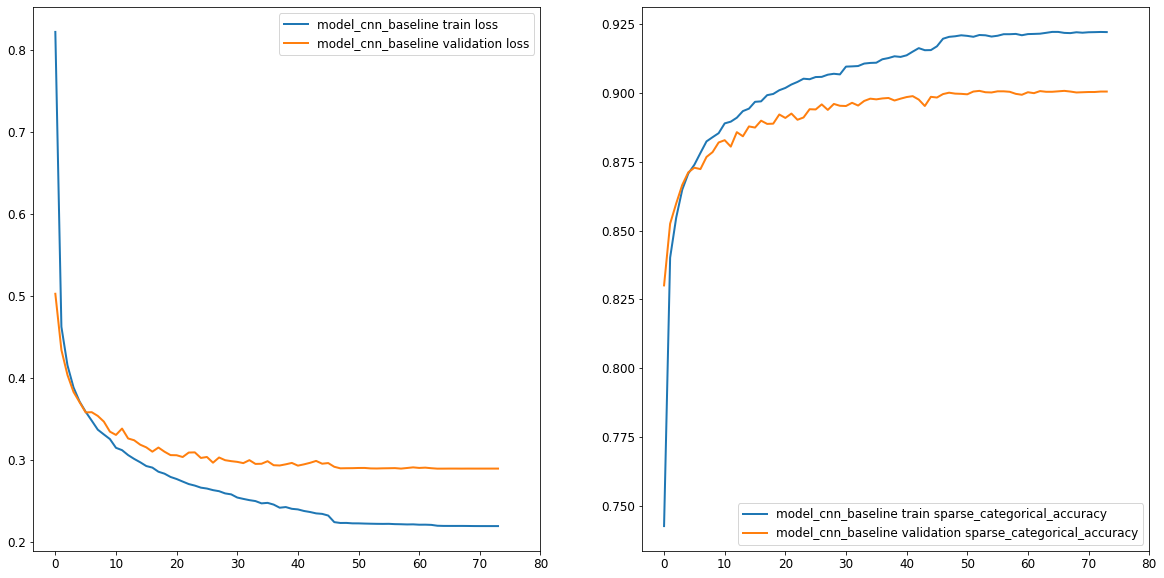

In [40]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": False, "pool": { "size": (2,2)}},
]

model_cnn_baseline , model_cnn_baseline_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_baseline", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

Visualize.history({"model_cnn_baseline": model_cnn_baseline_history})
model_cnn_baseline_evaluation = CNN.evaluate(model_cnn_baseline, X_test_cnn, test_labels)
CNN.summary(model_cnn_baseline_history, model_cnn_baseline_evaluation)
CNN.clean_up(model_cnn_baseline)

#### With Batch Normalization

In [43]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": True, "pool": { "size": (2,2)}},
]

model_cnn_batch_norm , model_cnn_batch_norm_history = CNN.train((X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_batch_norm", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)
model_cnn_baseline_evaluation = CNN.evaluate(model_cnn_baseline, X_test_cnn, test_labels)
CNN.clean_up(model_cnn_batch_norm)

Model: "model_cnn_batch_norm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 8)         32        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
cnn_flatten_connect (Flatten (None, 1568)              0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                15690     
Total params: 15,802
Trainable params: 15,786
Non-trainable params: 16
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f67040e9cd0>
Fit

#### With Batch Normalization and Dropout

In [44]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_batch_norm_dropout , model_cnn_batch_norm_dropout_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_batch_norm_dropout", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

CNN.clean_up(model_cnn_batch_norm_dropout)

Model: "model_cnn_batch_norm_dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 8)         32        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 8)         0         
_________________________________________________________________
cnn_flatten_connect (Flatten (None, 1568)              0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                15690     
Total params: 15,802
Trainable params: 15,786
Non-trainable params: 16
_________________________________

#### Summary

,model_name,train_loss,validation_loss,train_categorical_accuracy,validation_categorical_accuracy
0,model_cnn_baseline,0.219245,0.289458,0.922104,0.900500
1,model_cnn_batch_norm,0.183073,0.285795,0.934167,0.902500
2,model_cnn_batch_norm_dropout,0.231048,0.269737,0.915313,0.908333


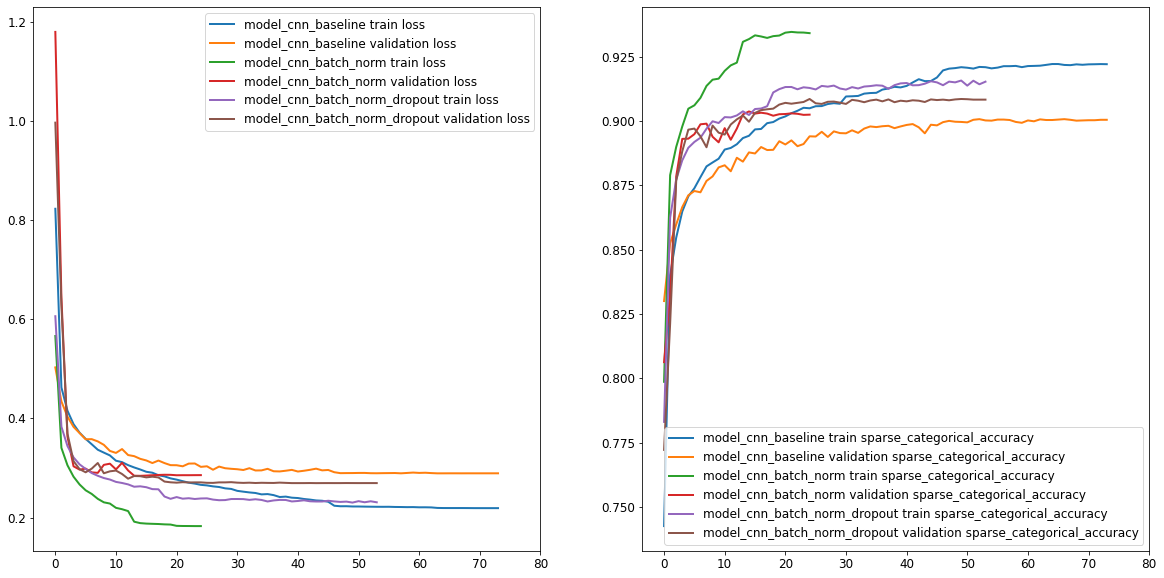

In [45]:
Visualize.history({
    "model_cnn_baseline": model_cnn_baseline_history,
    "model_cnn_batch_norm": model_cnn_batch_norm_history,
    "model_cnn_batch_norm_dropout": model_cnn_batch_norm_dropout_history,
})


model_cnn_batch_norm_evaluation = CNN.evaluate(model_cnn_batch_norm, X_test_cnn, test_labels)
model_cnn_batch_norm_dropout_evaluation = CNN.evaluate(model_cnn_batch_norm_dropout, X_test_cnn, test_labels)
t = MLP.create_stats([
    ("model_cnn_baseline", model_cnn_baseline_history, model_cnn_baseline_evaluation),
    ("model_cnn_batch_norm", model_cnn_batch_norm_history, model_cnn_batch_norm_evaluation),
    ("model_cnn_batch_norm_dropout", model_cnn_batch_norm_dropout_history, model_cnn_batch_norm_dropout_evaluation),
])

display(t.drop(["test_loss", "test_categorical_accuracy"], axis=1))

### More CNN layers

#### CNN 2 Layers first 8

Model: "model_cnn_8_2_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 8)         32        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 8)         0         
_________________________________________________________________
conv_1_16_3.3_1.1_same_1.1_r (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 14, 14, 16)        64        
_________________________________________________________________
max_pool_1_2.2_2.2_same_relu (None, 7, 7, 16) 

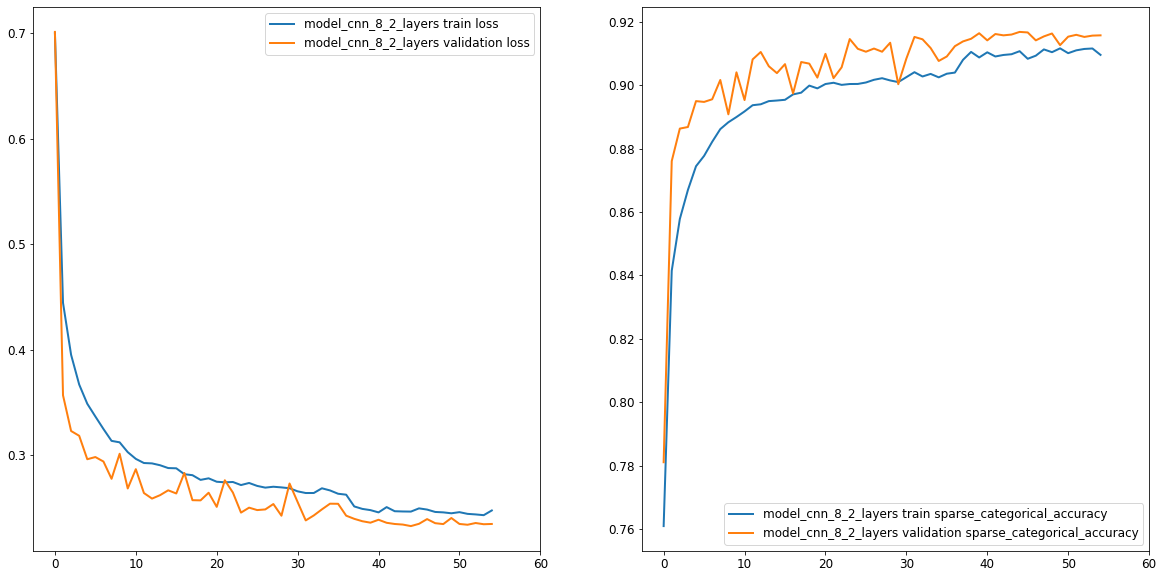

In [36]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_8_2_layers , model_cnn_8_2_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_8_2_layers", conv_layers=conv_layers, epochs=300, verbose=0)

Visualize.history({"model_cnn_8_2_layers": model_cnn_8_2_layers_history})
model_cnn_8_2_layers_evaluation = CNN.evaluate(model_cnn_8_2_layers, X_test_cnn, test_labels)
CNN.summary(model_cnn_8_2_layers_history, model_cnn_8_2_layers_evaluation)
CNN.clean_up(model_cnn_8_2_layers)

#### CNN 3 layers first 8

Model: "model_cnn_8_3_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 8)         32        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 8)         0         
_________________________________________________________________
conv_1_16_3.3_1.1_same_1.1_r (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 14, 14, 16)        64        
_________________________________________________________________
max_pool_1_2.2_2.2_same_relu (None, 7, 7, 16) 

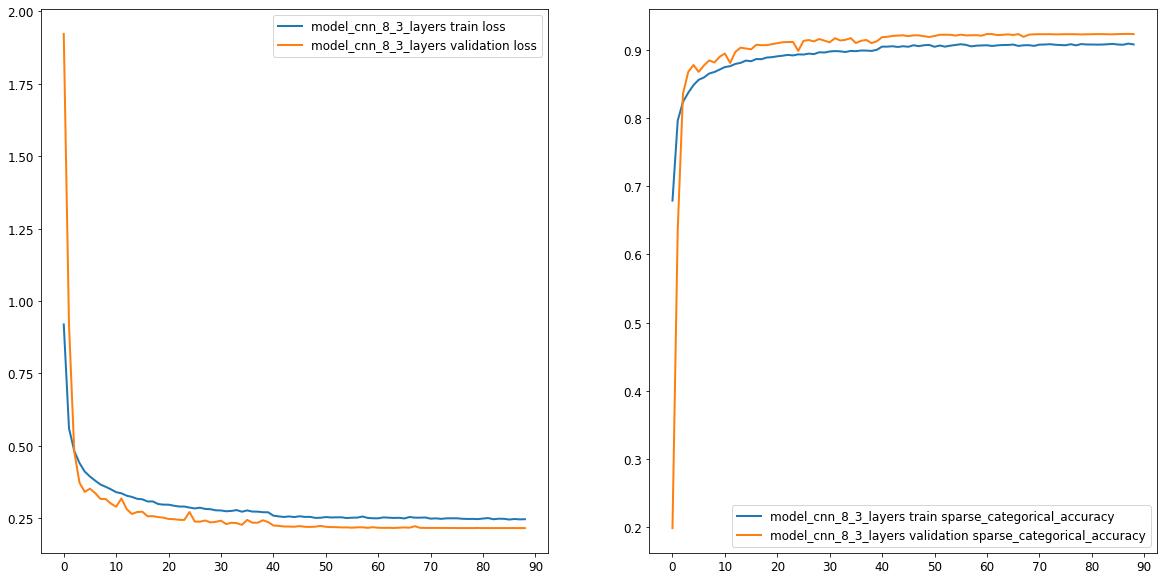

In [37]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 32, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_8_3_layers , model_cnn_8_3_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_8_3_layers", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

model_cnn_8_3_layers_evaluation = CNN.evaluate(model_cnn_8_3_layers, X_test_cnn, test_labels)
Visualize.history({"model_cnn_8_3_layers": model_cnn_8_3_layers_history})
CNN.summary(model_cnn_8_3_layers_history, model_cnn_8_3_layers_evaluation)
CNN.clean_up(model_cnn_8_3_layers)

#### CNN 4 layers first 8

Model: "model_cnn_8_4_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_8_3.3_1.1_same_1.1_re (None, 28, 28, 8)         80        
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 8)         32        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 8)         0         
_________________________________________________________________
conv_1_16_3.3_1.1_same_1.1_r (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 14, 14, 16)        64        
_________________________________________________________________
max_pool_1_2.2_2.2_same_relu (None, 7, 7, 16) 

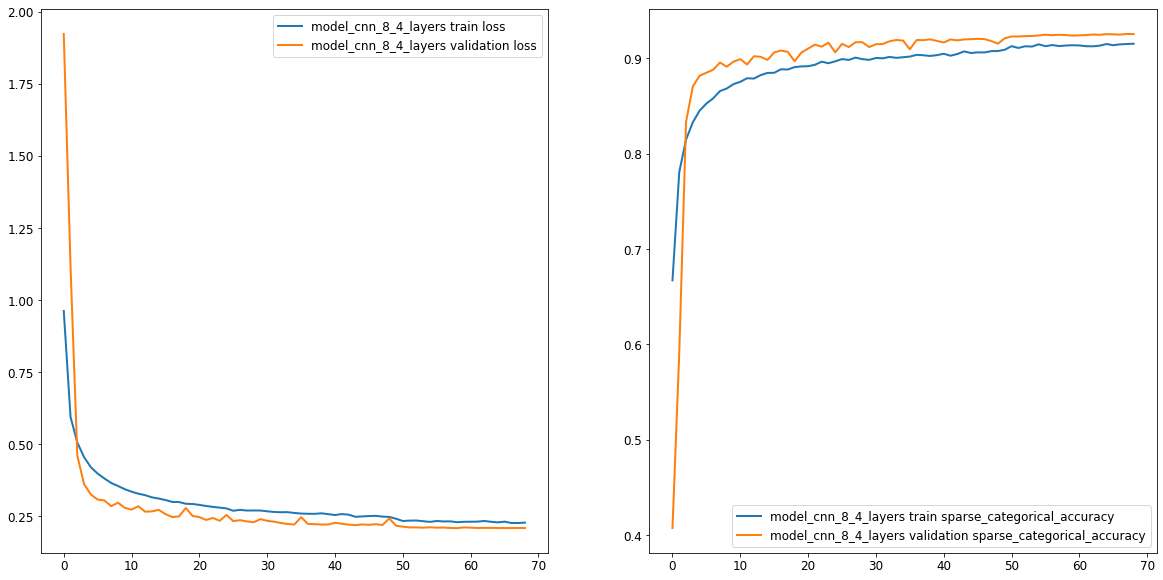

In [38]:
conv_layers = [
    {"filters": 8, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 32, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 64, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_8_4_layers , model_cnn_8_4_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_8_4_layers", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

Visualize.history({"model_cnn_8_4_layers": model_cnn_8_4_layers_history})
model_cnn_8_4_layers_evaluation = CNN.evaluate(model_cnn_8_4_layers, X_test_cnn, test_labels)
CNN.summary(model_cnn_8_4_layers_history, model_cnn_8_4_layers_evaluation)
CNN.clean_up(model_cnn_8_4_layers)

#### Summary

,model_name,train_loss,validation_loss,train_categorical_accuracy,validation_categorical_accuracy
0,model_cnn_batch_norm_dropout,0.231048,0.269737,0.915313,0.908333
1,model_cnn_8_2_layers,0.247815,0.235022,0.909583,0.915750
2,model_cnn_8_3_layers,0.247051,0.216466,0.908292,0.923500
3,model_cnn_8_4_layers,0.228378,0.209603,0.915146,0.925250


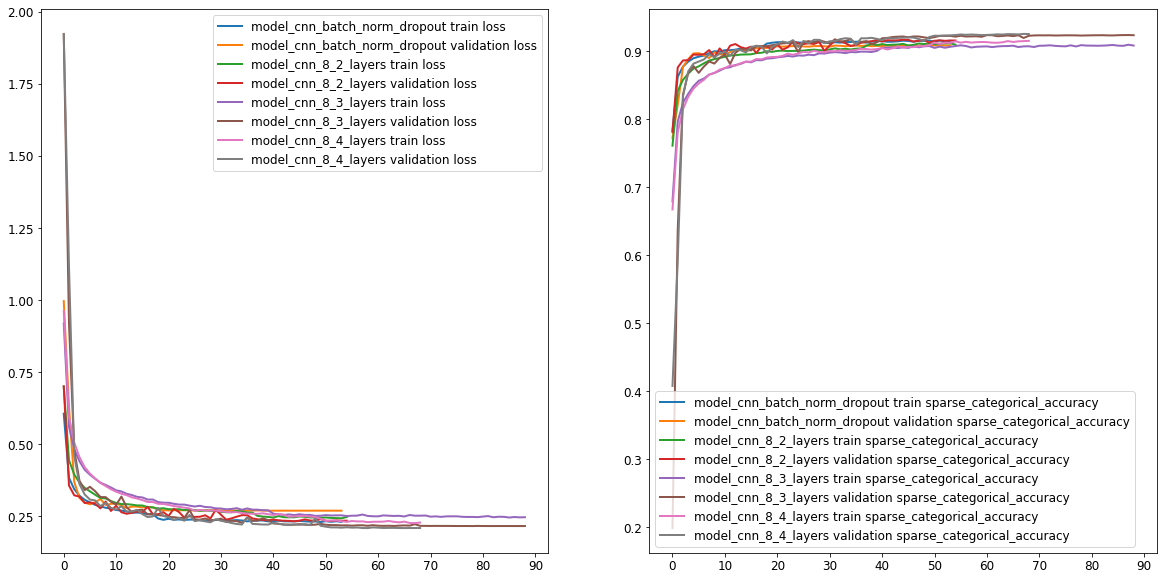

In [49]:
Visualize.history({
    "model_cnn_batch_norm_dropout": model_cnn_batch_norm_dropout_history,
    "model_cnn_8_2_layers": model_cnn_8_2_layers_history,
    "model_cnn_8_3_layers": model_cnn_8_3_layers_history,
    "model_cnn_8_4_layers": model_cnn_8_4_layers_history
})

model_cnn_8_2_layers_evaluation = CNN.evaluate(model_cnn_8_2_layers, X_test_cnn, test_labels)
model_cnn_8_3_layers_evaluation = CNN.evaluate(model_cnn_8_3_layers, X_test_cnn, test_labels)
model_cnn_8_4_layers_evaluation = CNN.evaluate(model_cnn_8_4_layers, X_test_cnn, test_labels)

t = MLP.create_stats([
    ("model_cnn_batch_norm_dropout", model_cnn_batch_norm_dropout_history, model_cnn_batch_norm_dropout_evaluation),
    ("model_cnn_8_2_layers", model_cnn_8_2_layers_history, model_cnn_8_2_layers_evaluation),
    ("model_cnn_8_3_layers", model_cnn_8_3_layers_history, model_cnn_8_3_layers_evaluation),
    ("model_cnn_8_4_layers", model_cnn_8_4_layers_history, model_cnn_8_4_layers_evaluation),
])

display(t.drop(["test_loss", "test_categorical_accuracy"], axis=1))

### More Filters

#### CNN 1 Layers first 16

In [31]:
conv_layers = [
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_16_1_layers , model_cnn_16_1_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_16_1_layers", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

# Visualize.history({"model_cnn_8_2_layers": model_cnn_8_2_layers_history})
# model_cnn_8_2_layers_evaluation = CNN.evaluate(model_cnn_8_2_layers, X_test_cnn, test_labels)
# CNN.summary(model_cnn_8_2_layers_history, model_cnn_8_2_layers_evaluation)
CNN.clean_up(model_cnn_16_1_layers)

Model: "model_cnn_16_1_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_16_3.3_1.1_same_1.1_r (None, 28, 28, 16)        160       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 16)        64        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 16)        0         
_________________________________________________________________
cnn_flatten_connect (Flatten (None, 3136)              0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                31370     
Total params: 31,594
Trainable params: 31,562
Non-trainable params: 32
________________________________________

#### CNN 2 Layers first 16

In [32]:
conv_layers = [
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 32, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_16_2_layers , model_cnn_16_2_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_16_2_layers", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

# Visualize.history({"model_cnn_8_2_layers": model_cnn_8_2_layers_history})
# model_cnn_8_2_layers_evaluation = CNN.evaluate(model_cnn_8_2_layers, X_test_cnn, test_labels)
# CNN.summary(model_cnn_8_2_layers_history, model_cnn_8_2_layers_evaluation)
CNN.clean_up(model_cnn_16_2_layers)

Model: "model_cnn_16_2_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_16_3.3_1.1_same_1.1_r (None, 28, 28, 16)        160       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 16)        64        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 16)        0         
_________________________________________________________________
conv_1_32_3.3_1.1_same_1.1_r (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 14, 14, 32)        128       
_________________________________________________________________
max_pool_1_2.2_2.2_same_relu (None, 7, 7, 32)

#### CNN 3 layers first 16

In [33]:
conv_layers = [
    {"filters": 16, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 32, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
    {"filters": 64, "kernel_size": (3,3), "batch_norm": True, "dropout": 0.2, "pool": { "size": (2,2)}},
]

model_cnn_16_3_layers , model_cnn_16_3_layers_history = CNN.train(
    (X_train_cnn, y_train), (X_val_cnn, y_val), name="model_cnn_16_3_layers", conv_layers=conv_layers, epochs=300, batch_size=256, verbose=0)

# Visualize.history({"model_cnn_8_2_layers": model_cnn_8_2_layers_history})
# model_cnn_8_2_layers_evaluation = CNN.evaluate(model_cnn_8_2_layers, X_test_cnn, test_labels)
# CNN.summary(model_cnn_8_2_layers_history, model_cnn_8_2_layers_evaluation)
CNN.clean_up(model_cnn_16_3_layers)

Model: "model_cnn_16_3_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_16_3.3_1.1_same_1.1_r (None, 28, 28, 16)        160       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 16)        64        
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_0_0.2 (Dropout)      (None, 14, 14, 16)        0         
_________________________________________________________________
conv_1_32_3.3_1.1_same_1.1_r (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 14, 14, 32)        128       
_________________________________________________________________
max_pool_1_2.2_2.2_same_relu (None, 7, 7, 32)

#### Summary

In [ ]:
Visualize.history({
    "model_cnn_16_1_layers": model_cnn_16_1_layers_history,
    "model_cnn_16_2_layers": model_cnn_16_2_layers_history,
    "model_cnn_16_3_layers": model_cnn_16_3_layers_history
})

model_cnn_16_1_layers_evaluation = CNN.evaluate(model_cnn_16_1_layers, X_test_cnn, test_labels)
model_cnn_16_2_layers_evaluation = CNN.evaluate(model_cnn_16_2_layers, X_test_cnn, test_labels)
model_cnn_16_3_layers_evaluation = CNN.evaluate(model_cnn_16_3_layers, X_test_cnn, test_labels)

t = MLP.create_stats([
    ("model_cnn_16_1_layers", model_cnn_16_1_layers_history, model_cnn_16_1_layers_evaluation),
    ("model_cnn_16_2_layers", model_cnn_16_2_layers_history, model_cnn_16_2_layers_evaluation),
    ("model_cnn_16_3_layers", model_cnn_16_3_layers_history, model_cnn_16_3_layers_evaluation),
])

display(t.drop(["test_loss", "test_categorical_accuracy"], axis=1))

### Talos

#### CNN Architecture

In [50]:
import talos
import pandas as pd

In [24]:
talos_callbacks = [
    CNN.earlyStopping, 
    CNN.reduceLROnPlateau,
]

def cnn_model(x_train, y_train, x_val, y_val, params):
    print("================================")
    K.clear_session()
    conv_layers = []
    architecture =  params["architecture"]
    layers = architecture[0]
    starting_filters = architecture[1]
    
    for i in range(layers):
        conv_layers.append({"filters": starting_filters*(2**i), "activation": params["activation"], "dropout": params['dropout'], "batch_norm": True})
    print(conv_layers)
    talos_model = CNN.create_model(name="talos_model", conv_layers=conv_layers, optimizer=params['optimizer'][0](**params['optimizer'][1]))
    

    talos_model_history = CNN.fit(
        (x_train, y_train), 
        (x_val, y_val), 
        talos_model,
        epochs=params["epochs"],
        batch_size=params["batch_size"],
        callbacks=talos_callbacks,
        verbose=1
    )
    talos_model_evaluation = CNN.evaluate(talos_model, X_test_cnn, test_labels)
    CNN.summary(talos_model_history, talos_model_evaluation)
    print("================================")
    return talos_model_history, talos_model

In [25]:
# The archutecture represents the number of units per layer
# e.g. [32] means 1 layer
#      [64, 32] means 2 layers 1st: 64 units, 2nd: 32 units
p_architecture = {
    'architecture':[
        [3, 32], [3, 64], [3, 128],
    ],
    'batch_size': [256],
    'epochs': [300],
    'dropout': [0.2, 0.25, 0.3],
    'optimizer': [
        (tf.keras.optimizers.Adam, {"lr": 0.001}),
    ],
    'activation':['relu'],
    'last_activation': ['softmax']
}

# and run the experiment
t_architecture = talos.Scan(
    x=X_train_cnn, 
    y = y_train,
    model=cnn_model,
    params=p_architecture,
    x_val=X_val_cnn,
    y_val=y_val,
    experiment_name='fashion_minst_cnn',
    print_params=True
)

  0%|          | 0/9 [00:00<?, ?it/s]

{'activation': 'relu', 'architecture': [3, 32], 'batch_size': 256, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 32, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 64, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_32_3.3_1.1_same_1.1_r (None, 28, 28, 32)        320       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28, 28, 32)        128       
_________________________________________________________________
max_pool_0_2.2_2.2_same_relu (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_

 11%|█         | 1/9 [16:31<2:12:13, 991.63s/it]

Train loss 0.1040233447154363
Validation loss 0.19347048437595368
Test loss 0.2165070015989244
Train categorical accuracy 0.9610416889190674
Validation categorical accuracy 0.937250018119812
Test categorical accuracy 0.9323999881744385
{'activation': 'relu', 'architecture': [3, 32], 'batch_size': 256, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 32, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 64, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_32_3.3_1.1_same_1.1_r (None, 28, 28, 32)        320       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (No

 22%|██▏       | 2/9 [31:48<1:53:04, 969.22s/it]

Train loss 0.17172319388389587
Validation loss 0.1931875543196996
Test loss 0.21376187617778777
Train categorical accuracy 0.9365416765213013
Validation categorical accuracy 0.9314166903495789
Test categorical accuracy 0.9241999983787537
{'activation': 'relu', 'architecture': [3, 32], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 32, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 64, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_32_3.3_1.1_same_1.1_r (None, 28, 28, 32)        320       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None

 33%|███▎      | 3/9 [46:18<1:33:56, 939.45s/it]

Train loss 0.16955173861980438
Validation loss 0.18443871621290842
Test loss 0.21097124207019807
Train categorical accuracy 0.9381041526794434
Validation categorical accuracy 0.9355833530426025
Test categorical accuracy 0.9290000200271606
{'activation': 'relu', 'architecture': [3, 64], 'batch_size': 256, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 64, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_64_3.3_1.1_same_1.1_r (None, 28, 28, 64)        640       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (No

 44%|████▍     | 4/9 [1:12:13<1:33:40, 1124.20s/it]

Train loss 0.08716630935668945
Validation loss 0.18814145386219025
Test loss 0.2138935264021158
Train categorical accuracy 0.9680833220481873
Validation categorical accuracy 0.9388333559036255
Test categorical accuracy 0.9320999979972839
{'activation': 'relu', 'architecture': [3, 64], 'batch_size': 256, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 64, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_64_3.3_1.1_same_1.1_r (None, 28, 28, 64)        640       
_________________________________________________________________
batch_norm_0 (BatchNormaliza 

 56%|█████▌    | 5/9 [1:41:47<1:27:56, 1319.09s/it]

Train loss 0.10441461259126664
Validation loss 0.18877865747610728
Test loss 0.21339722552746535
Train categorical accuracy 0.9615208506584167
Validation categorical accuracy 0.937666654586792
Test categorical accuracy 0.9322999715805054
{'activation': 'relu', 'architecture': [3, 64], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 64, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 128, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_64_3.3_1.1_same_1.1_r (None, 28, 28, 64)        640       
_________________________________________________________________
batch_norm_0 (BatchNormaliza (Non

 67%|██████▋   | 6/9 [2:18:08<1:18:53, 1577.68s/it]

Train loss 0.11370993427435556
Validation loss 0.1807668205499649
Test loss 0.2074423433497548
Train categorical accuracy 0.9570000171661377
Validation categorical accuracy 0.940583348274231
Test categorical accuracy 0.9330000281333923
{'activation': 'relu', 'architecture': [3, 128], 'batch_size': 256, 'dropout': 0.2, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 128, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}, {'filters': 512, 'activation': 'relu', 'dropout': 0.2, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_128_3.3_1.1_same_1.1_ (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_norm_0 (BatchNormaliza (Non

 78%|███████▊  | 7/9 [3:56:00<1:35:31, 2865.83s/it]

Train loss 0.0226504138695697
Validation loss 0.2443281669219335
Test loss 0.28332230282090604
Train categorical accuracy 0.9921875
Validation categorical accuracy 0.940833330154419
Test categorical accuracy 0.9350000023841858
{'activation': 'relu', 'architecture': [3, 128], 'batch_size': 256, 'dropout': 0.25, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 128, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}, {'filters': 512, 'activation': 'relu', 'dropout': 0.25, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_128_3.3_1.1_same_1.1_ (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_norm_0 (BatchNormaliza (None, 28

 89%|████████▉ | 8/9 [5:31:35<1:02:06, 3726.76s/it]

Train loss 0.047769321858882906
Validation loss 0.2105001715819041
Test loss 0.24192883090302347
Train categorical accuracy 0.9819999933242798
Validation categorical accuracy 0.9424999952316284
Test categorical accuracy 0.9361000061035156
{'activation': 'relu', 'architecture': [3, 128], 'batch_size': 256, 'dropout': 0.3, 'epochs': 300, 'last_activation': 'softmax', 'optimizer': (<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})}
[{'filters': 128, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 256, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'filters': 512, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}]
Model: "talos_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_128_3.3_1.1_same_1.1_ (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_norm_0 (BatchNormaliza (

100%|██████████| 9/9 [7:10:29<00:00, 2869.89s/it]  

Train loss 0.0633148462176323
Validation loss 0.20249634019533794
Test loss 0.23633546043410897
Train categorical accuracy 0.9769583344459534
Validation categorical accuracy 0.9423333406448364
Test categorical accuracy 0.9348999857902527


In [26]:
t_arch_analyze_object = talos.Analyze(t_architecture)

arch_results = pd.DataFrame(t_arch_analyze_object.data).sort_values(by='val_sparse_categorical_accuracy', ascending=False).drop(['start', 'end', 'duration'], axis=1)
arch_results.to_csv("results_talos_cnn_architecture.csv")
arch_results.head(10)

,round_epochs,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr,activation,architecture,batch_size,dropout,epochs,last_activation,optimizer
7,29,0.047769,0.982000,0.210500,0.942500,0.000010,relu,"[3, 128]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
8,31,0.063315,0.976958,0.202496,0.942333,0.000010,relu,"[3, 128]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
6,31,0.022650,0.992188,0.244328,0.940833,0.000010,relu,"[3, 128]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
5,39,0.113710,0.957000,0.180767,0.940583,0.000001,relu,"[3, 64]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
3,28,0.087166,0.968083,0.188141,0.938833,0.000010,relu,"[3, 64]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
4,32,0.104415,0.961521,0.188779,0.937667,0.000010,relu,"[3, 64]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
0,42,0.104023,0.961042,0.193470,0.937250,0.000010,relu,"[3, 32]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
2,38,0.169552,0.938104,0.184439,0.935583,0.000010,relu,"[3, 32]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"
1,40,0.171723,0.936542,0.193188,0.931417,0.000001,relu,"[3, 32]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})"


In [46]:
t_arch_cnn_eval = talos.Evaluate(t_architecture)

In [47]:
r_arch_cnn_reporting = talos.Reporting(t_architecture)

In [48]:
r_arch_cnn_reporting.rounds2high("val_sparse_categorical_accuracy")

7

In [49]:
r_arch_cnn_reporting.data.sort_values(by='val_sparse_categorical_accuracy', ascending=False).drop(['start', 'end', 'duration'], axis=1)

,round_epochs,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr,activation,architecture,batch_size,dropout,epochs,last_activation,optimizer,NaN
7,29,0.047769,0.982000,0.210500,0.942500,0.000010,relu,"[3, 128]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",7
8,31,0.063315,0.976958,0.202496,0.942333,0.000010,relu,"[3, 128]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",8
6,31,0.022650,0.992188,0.244328,0.940833,0.000010,relu,"[3, 128]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",6
5,39,0.113710,0.957000,0.180767,0.940583,0.000001,relu,"[3, 64]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",5
3,28,0.087166,0.968083,0.188141,0.938833,0.000010,relu,"[3, 64]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",3
4,32,0.104415,0.961521,0.188779,0.937667,0.000010,relu,"[3, 64]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",4
0,42,0.104023,0.961042,0.193470,0.937250,0.000010,relu,"[3, 32]",256,0.20,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",0
2,38,0.169552,0.938104,0.184439,0.935583,0.000010,relu,"[3, 32]",256,0.30,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",2
1,40,0.171723,0.936542,0.193188,0.931417,0.000001,relu,"[3, 32]",256,0.25,300,softmax,"(<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, {'lr': 0.001})",1


In [66]:
t_arch_cnn_eval.evaluate(X_test_cnn, test_labels, metric="val_sparse_categorical_accuracy", folds=5, shuffle=True, task = 'multi_class', print_out=True, model_id=7)

mean : 0.94 
 std : 0.00


[0.9406805409316699,
 0.9365244948008439,
 0.9384984128159033,
 0.931778114139726,
 0.933077886889284]

In [67]:
talos.Deploy(t_architecture, "talos_cnn_exp", 'val_sparse_categorical_accuracy')

Deploy package talos_cnn_exp have been saved.
data is not 2d, dummy data written instead.


In [68]:
from talos.utils.best_model import activate_model

best_cnn_model_talos = activate_model(t_architecture, 7)

In [69]:
tf.keras.models.save_model(best_cnn_model_talos, "models/model_cnn_final", overwrite=True, include_optimizer=True)

INFO:tensorflow:Assets written to: models/model_cnn_final/assets
